<p align="center">
  <img width="300" height="300" src="https://www.linkpicture.com/q/VISTRKR_Logo1.png">
</p>

## Modules

In [1]:
import numpy as np
import math
import sys

main_path = r"C:\Users\97254\OneDrive - Technion\Technion\09 Semester G\084653\Semester B\Week 01\pythonProject"
sys.path.insert(1, main_path)

# Import functions from different modules
from calibration import calib_functions
from estimation import estim_functions
from simulation import sim_functions

from main import calibrate_cameras, estimate_position, simulate_data

from data.general import *

In [2]:
NUMBER_OF_POINTS = 150
ERROR = 30 # pixel white gaussian noise STD

## Data Analysis

In [3]:
# Define a lambda function foo(x)
# foo = lambda x: 1.5 * np.cos(x / .8) - x + 16
foo = lambda x: 0.6*(x - 5.8)**3 + 1.5*(x - 5.8)**2 + -1.1*x + 13

# Generate points using the sim_functions module
simulated_points = sim_functions.generate_2d_points(foo, x_range=[1, 19], y_range=[1, 19], density=NUMBER_OF_POINTS)

# Simulate measurements using the cameras_data and generated points
measurements = simulate_data(cameras_data, simulated_points, noise_std=ERROR)

# Estimate the position of the points using cameras_data and measurements
estimated_points = estimate_position(cameras_data, measurements)

## Visualization

<IPython.core.display.Javascript object>


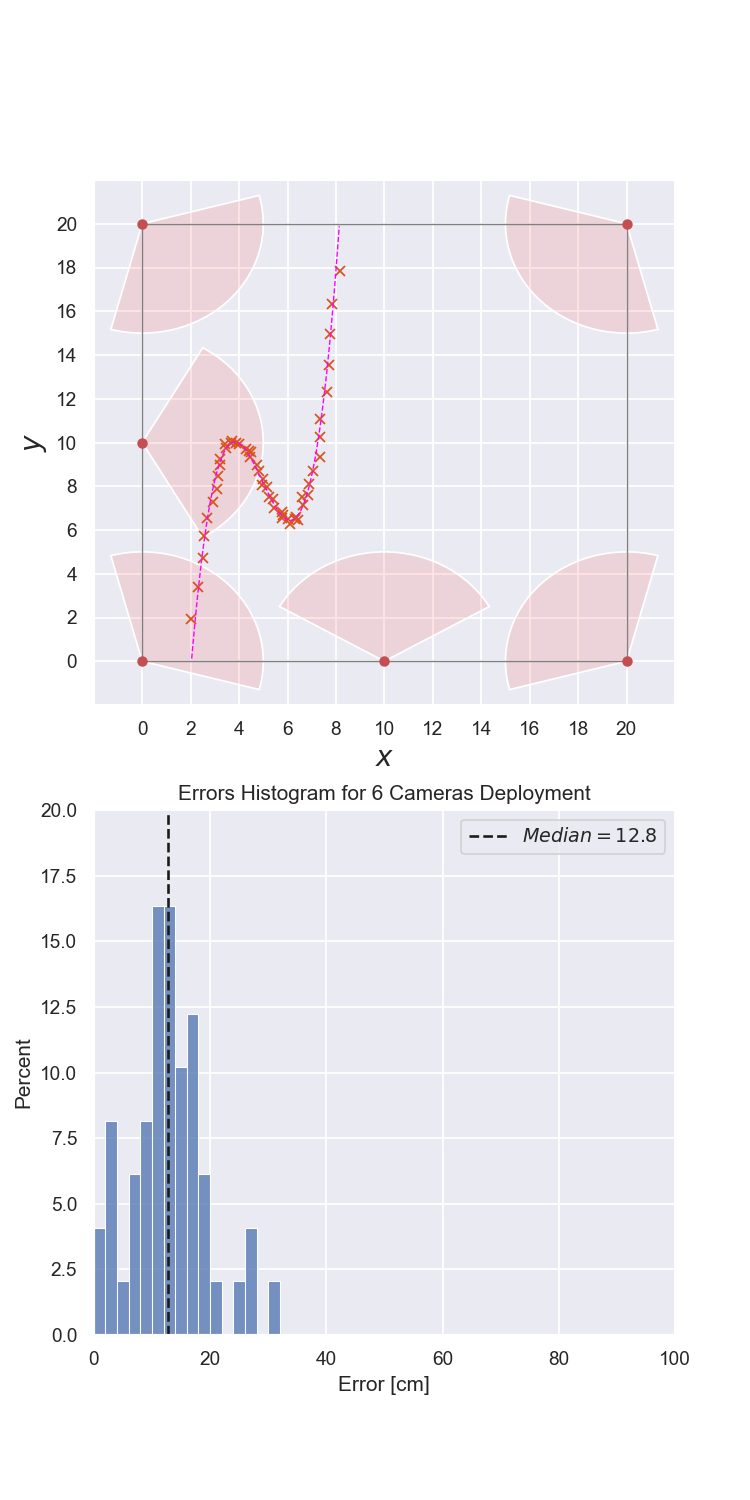

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from visualization.vis_functions import plot_filled_sector

%matplotlib notebook
sns.set(style='darkgrid')

X = np.linspace(0, 20, 500)
Y = foo(X)
mask = (0<=X) & (X<=20) & (0<=Y) & (Y<=20)
simulated_points = np.array(simulated_points)

fig, ax = plt.subplots(2, 1, figsize=(6,12))
# ax[0].set_aspect('equal')

# ax[0].plot(simulated_points[:, 0], simulated_points[:, 1], 'o', c='#0072BD')
ax[0].plot(estimated_points[:, 0], estimated_points[:, 1], 'x', c='#D95319')
ax[0].plot(X[mask], Y[mask], lw=.8, ls='--', c='#FF00FF')

for camera in cameras_data:
    plot_filled_sector(camera['position'], camera['azimuth'], 5, 120, ax[0], sector_color=[1, 0, 0, .1])
    
ax[0].hlines([0, 20], 0, 20, colors='grey', lw=.8)
ax[0].vlines([0, 20], 0, 20, colors='grey', lw=.8)


ax[0].set_xticks(np.arange(0, 21, 2)) ; ax[0].set_yticks(np.arange(0, 21, 2))
ax[0].set_xlim([-2, 22]) ; ax[0].set_ylim([-2, 22])
ax[0].set_xlabel('$x$', size=16) ; ax[0].set_ylabel('$y$', size=16)


errors = np.linalg.norm(simulated_points - estimated_points, axis=1)
err_median = np.median(errors*100)

sns.histplot(errors*100, stat="percent", binwidth=2, binrange=(0, 100), ax=ax[1])
ax[1].set(
    xlabel='Error [cm]',
    ylim=(0, 20),
    xlim=(0, 100),
    title='Errors Histogram for {:d} Cameras Deployment'.format(len(cameras_data)))
ax[1].axvline(err_median, color='k', ls='--')
ax[1].legend([f"$Median={err_median:.1f}$"])

plt.show()
# fig.savefig(f'errors_{len(cameras_data):d}_cameras.png', dpi=600)